<a href="https://colab.research.google.com/github/th-shristi/NeuroNexus/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Reading dataset
df = pd.read_csv("/content/tested.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.shape

(418, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#Missing data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#Filling missing data
df['Age'].replace(np.nan, df['Age'].mean(),inplace = True)
df['Fare'].replace(np.nan, df['Fare'].mean(),inplace = True)
df.drop('Cabin',axis = 1, inplace = True)

In [ ]:
df.isna().sum()
#Replaced null values in Age and Fare by its mean value and dropped the Cabin rows

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Embarked         3
dtype: int64

In [ ]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
round(df['Survived'].value_counts(normalize = True)*100,2)

0    63.64
1    36.36
Name: Survived, dtype: float64

There are 152 people, that is, 36.36% people survived Titanic disaster and the remaining, 266, i.e. 63.64% died


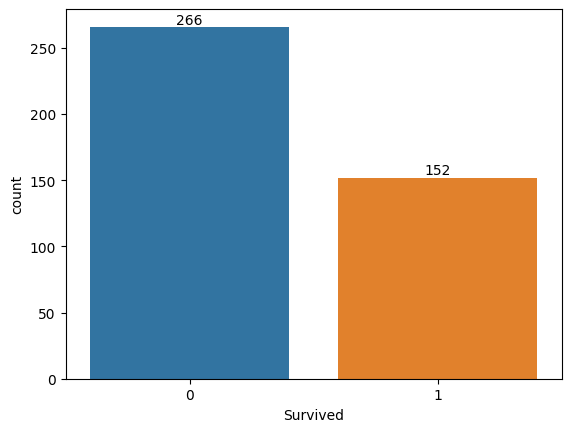

In [ ]:
a = sns.countplot(x = df['Survived'])
a.bar_label(a.containers[0])
plt.show()

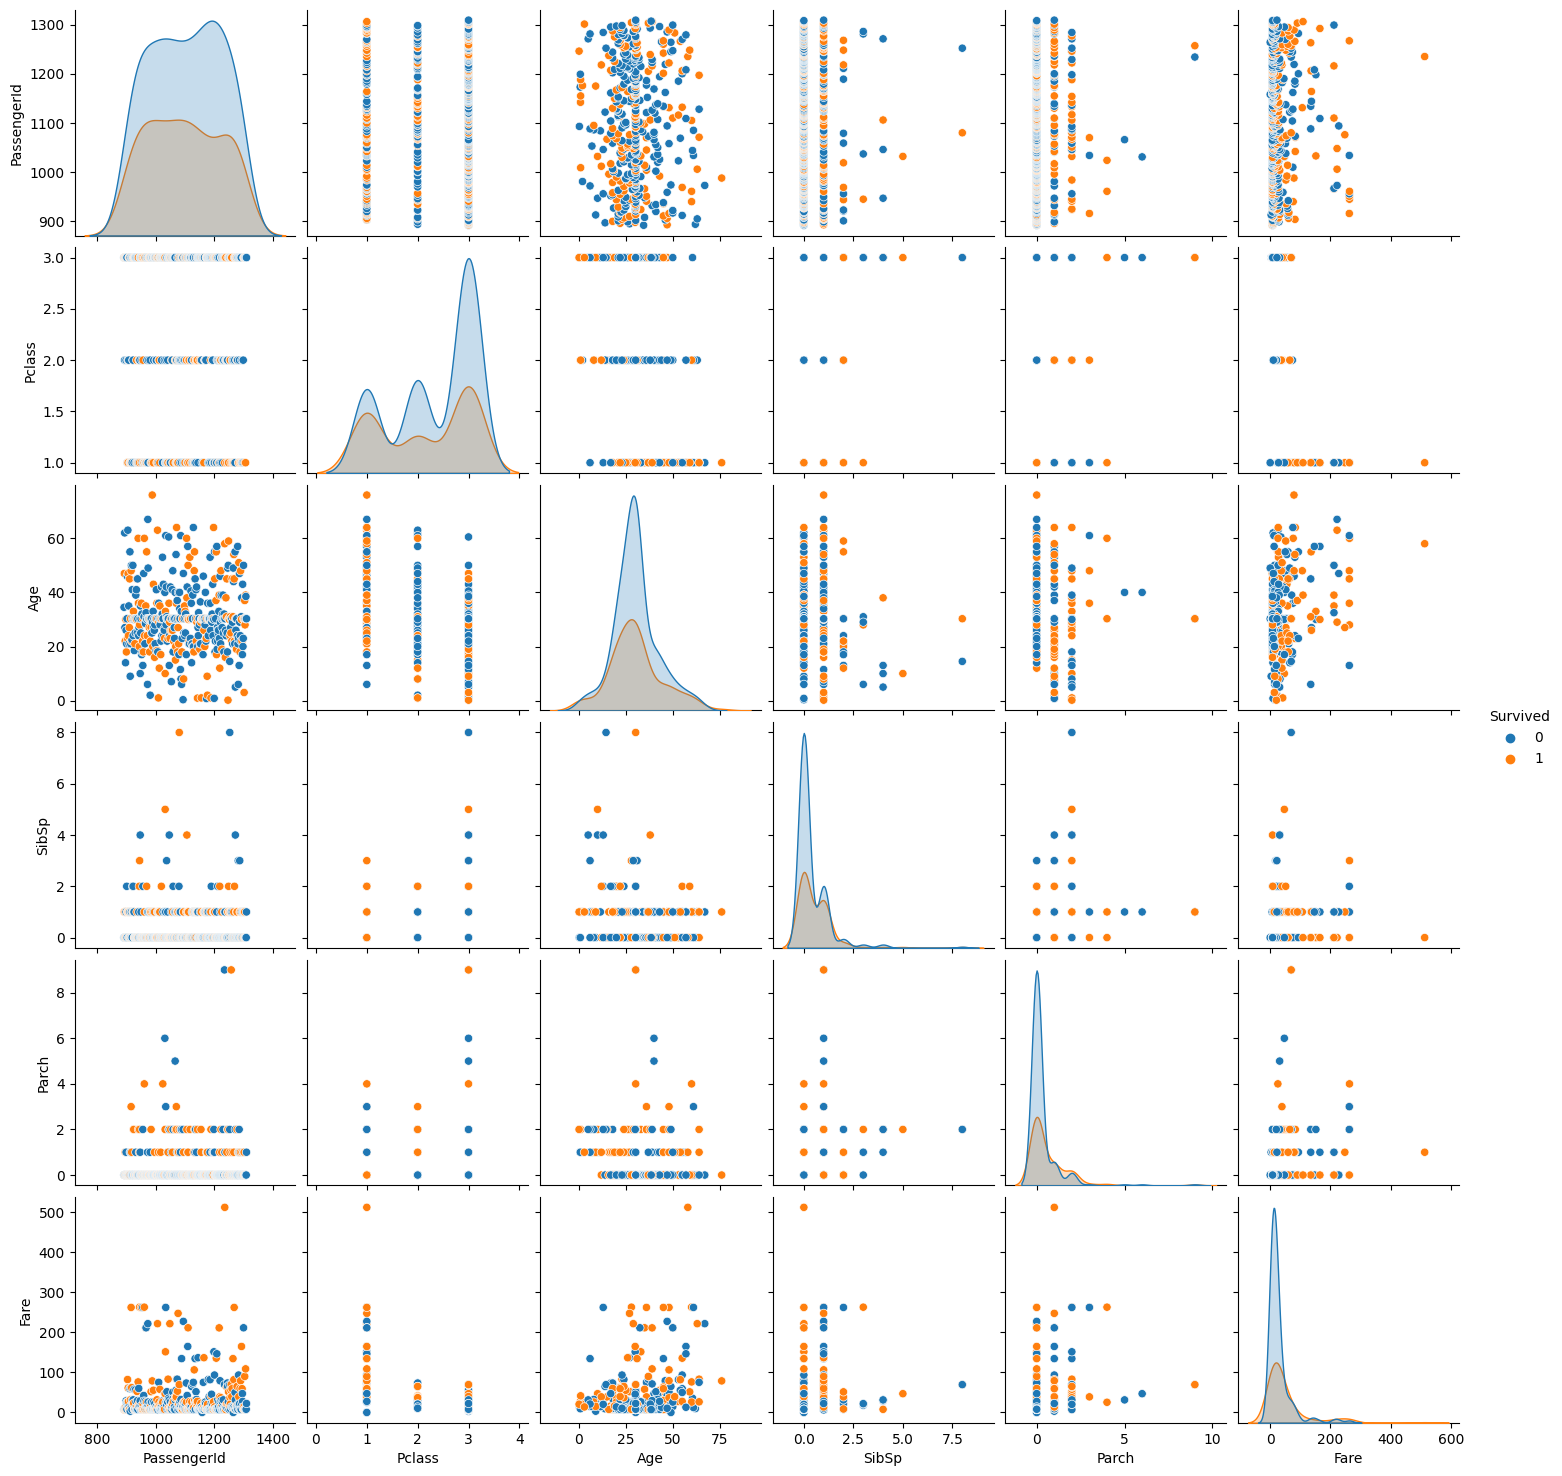

In [ ]:
sns.pairplot(df,hue='Survived')

<Axes: >

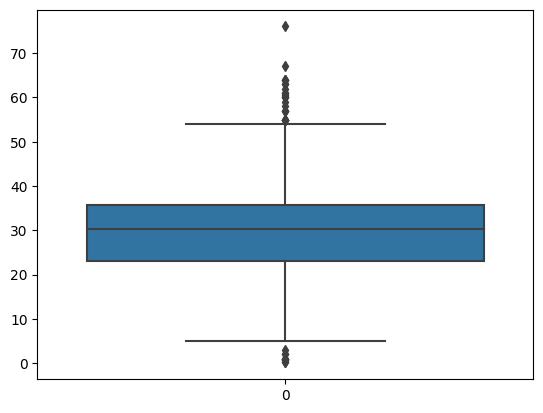

In [ ]:
sns.boxplot(df['Age'])


<ipython-input-31-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

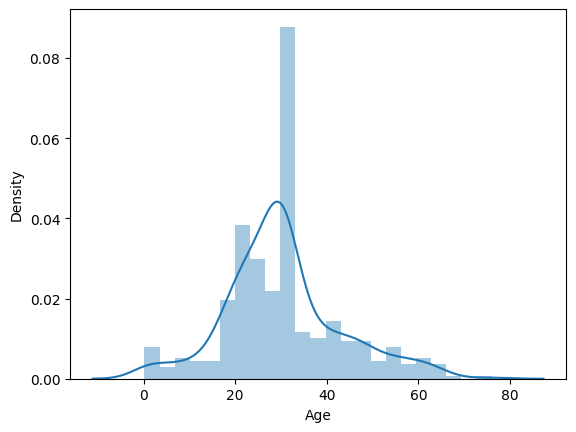

In [ ]:
sns.distplot(df['Age'])

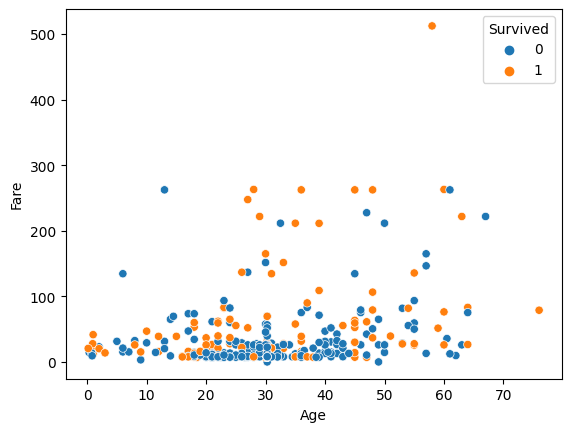

In [ ]:
sns.scatterplot(data = df, x = 'Age', y = 'Fare', hue = 'Survived')
plt.show()

According to the above visualizations here are some points we can take-
1. Passenger with higher fare have high chance of surviving
2. Mostly passengers are between 20-40 years of age and there exist some outliers as well


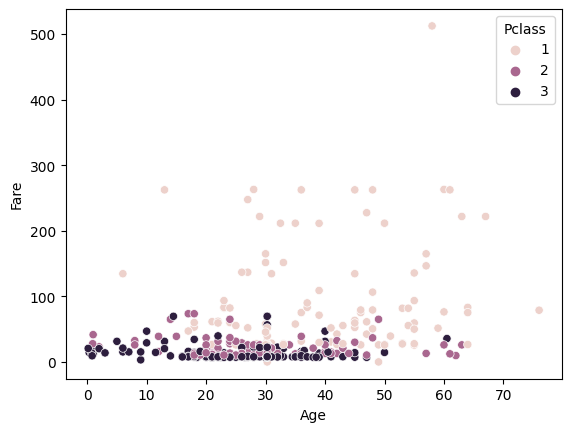

In [ ]:
sns.scatterplot(data = df, x = 'Age', y = 'Fare', hue = 'Pclass')
plt.show()

In [ ]:
#Updating dataset for modelling
df1 = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [ ]:
df1['Sex'].replace({'male':1, 'female':0}, inplace = True)
df1['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace=True)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,0
1,1,3,0,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,0
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,0,22.0,1,1,12.2875,1


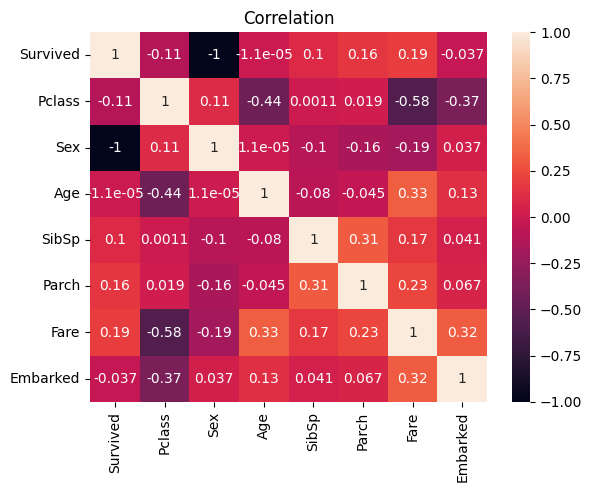

In [ ]:
#Correlation between cols
sns.heatmap(df1.corr(), annot = True)
plt.title("Correlation")
plt.show()

In [ ]:
#Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
X = df1.drop('Survived', axis=1)
y = df1['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [ ]:
# spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
#Predictions
y_pred_train = LR.predict(X_train)

In [ ]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [ ]:
y_pred_LR = LR.predict(X_test)

In [ ]:
LR.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred_LR))
print('Precision: ', precision_score(y_test, y_pred_LR))
print('Recall: ', recall_score(y_test, y_pred_LR))
print('F1 Score: ', f1_score(y_test, y_pred_LR))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


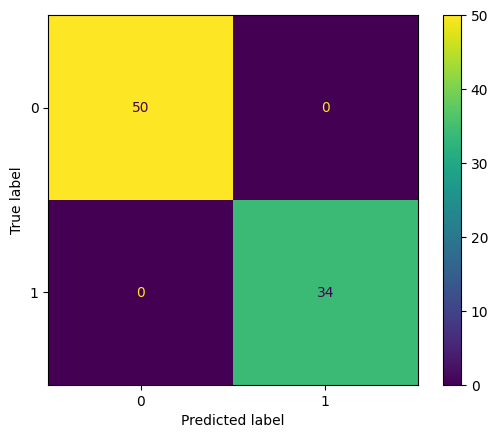

In [ ]:
cm = confusion_matrix(y_test, y_pred_LR, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot();

Logistic regression model has 100% accuracy, that is, the model has correctly predicted all test samples


In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred_tree))
print('Precision: ', precision_score(y_test, y_pred_tree))
print('Recall: ', recall_score(y_test, y_pred_tree))
print('F1 Score: ', f1_score(y_test, y_pred_tree))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


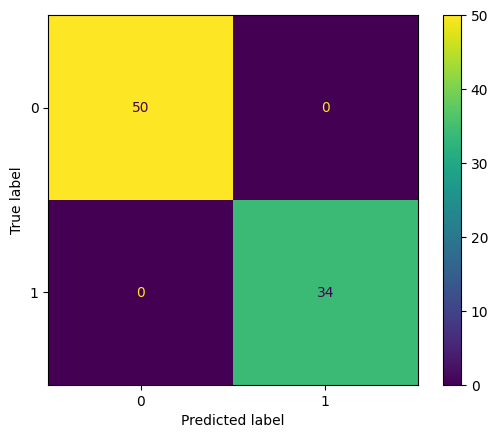

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot();

Decision tree has correctly tested all cases with 100% accuracy

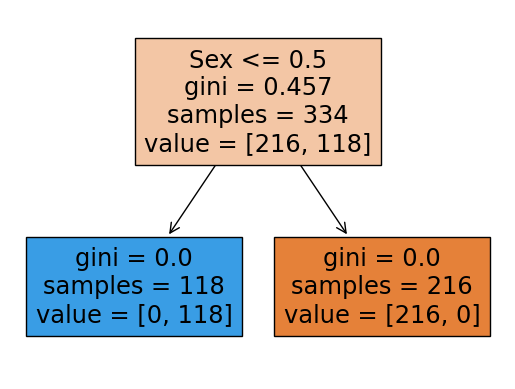

In [ ]:
from sklearn.tree import plot_tree
plot_tree(tree, filled=True, feature_names=list(X.columns))
plt.show()

**SUMMARY**

1. There are 36.36% passengers who survived Titanic disaster and 63.64% passengers who did not survive.
2. All of the females survived the disaster and all of the males did not survive the disaster.
3. The number of not surviving passengers is high for passenger class 3 and 2.
4. The passngers who embarked from Queenstown have good chance of survival and the passngers who embarked from Southampton have less chance of survival.

5. The models Logistic regression and Decision tree resulted in 100% accuracy.